In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'credit.csv')
credit = pd.read_csv(data_path, delimiter = ',')
# Clean the dataset
credit = credit[credit['Age']>0]

In [3]:
# Convert object features to categorical features
credit_clean = credit.copy(deep=True)
for column in credit_clean.columns:   
    if column not in ['CreditAmount', 'Age', 'Duration', 'Approve']: 
        credit_clean[column] = credit_clean[column].astype('category')
        
# Check the data
credit_clean.head(10)

,CheckingAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,YearsEmployed,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherPlans,Housing,NumCreditsAtBank,Job,Dependents,Telephone,Foreign,Approve
1,<0,6.0,critical,television,1169.0,unknown,>=7,4.0,male_single,none,...,real_estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
2,<200,48.0,ok_til_now,television,5951.0,<100,<4,2.0,female,none,...,real_estate,22.0,none,own,1.0,skilled,1.0,no,yes,bad
3,none,12.0,critical,education,2096.0,<100,<7,2.0,male_single,none,...,real_estate,49.0,none,own,1.0,unskilled,2.0,no,yes,good
4,<0,42.0,ok_til_now,furniture,7882.0,<100,<7,2.0,male_single,guarantor,...,savings,45.0,none,free,1.0,skilled,2.0,no,yes,good
5,<0,24.0,past_delays,car_new,4870.0,<100,<4,3.0,male_single,none,...,unknown,53.0,none,free,2.0,skilled,2.0,no,yes,bad
6,none,36.0,ok_til_now,education,9055.0,unknown,<4,2.0,male_single,none,...,unknown,35.0,none,free,1.0,unskilled,2.0,yes,yes,good
7,none,24.0,ok_til_now,furniture,2835.0,<1000,>=7,3.0,male_single,none,...,savings,53.0,none,own,1.0,skilled,1.0,no,yes,good
8,<200,36.0,ok_til_now,car_used,6948.0,<100,<4,2.0,male_single,none,...,car,35.0,none,rent,1.0,management,1.0,yes,yes,good
9,none,12.0,ok_til_now,television,3059.0,>=1000,<7,2.0,male_divorced,none,...,real_estate,61.0,none,own,1.0,unskilled,1.0,no,yes,good
10,<200,30.0,critical,car_new,5234.0,<100,unemployed,4.0,male_married,none,...,car,28.0,none,own,2.0,management,1.0,no,yes,bad


In [4]:
credit_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CheckingAccount   1000 non-null   category
 1   Duration          1000 non-null   float64 
 2   CreditHistory     1000 non-null   category
 3   Purpose           1000 non-null   category
 4   CreditAmount      1000 non-null   float64 
 5   SavingsAccount    1000 non-null   category
 6   YearsEmployed     1000 non-null   category
 7   InstallmentRate   1000 non-null   category
 8   PersonalStatus    1000 non-null   category
 9   OtherDebtors      1000 non-null   category
 10  ResidentSince     1000 non-null   category
 11  Property          1000 non-null   category
 12  Age               1000 non-null   float64 
 13  OtherPlans        1000 non-null   category
 14  Housing           1000 non-null   category
 15  NumCreditsAtBank  1000 non-null   category
 16  Job               1000 n

In [5]:
# Use the one-hot-encoding method to transform the categorical data(the way used in our Lab material)
X = pd.get_dummies(credit_clean.drop('Approve', axis=1))
X[['CreditAmount', 'Age', 'Duration']] = credit_clean[['CreditAmount', 'Age', 'Duration']]
column_names = X.columns
# Convert to Numpy Array
X = X.values
print('X shape: {}'.format(X.shape))

X shape: (1000, 71)


In [6]:
# Use OrdinalEncoder to transform the categorical data
oe = OrdinalEncoder()
oe.fit(credit_clean.drop('Approve', axis=1))
X_oe = oe.transform(credit_clean.drop('Approve', axis=1))
print('X shape: {}'.format(X_oe.shape))

X shape: (1000, 20)


In [7]:
# Get the target values
y = credit_clean['Approve']
print('y shape: {}'.format(np.shape(y)))

y shape: (1000,)


In [8]:
# Split the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_oe, y, train_size = 0.9, test_size=0.1, random_state=0)

In [9]:
# Fit a dt model based on the one-hot-encoding dataset
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1000)
dt.fit(X_train.astype(float), y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1000)

In [10]:
# Fit a dt model based on the OrdinalEncoder dataset
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1000)
dt1.fit(X1_train.astype(float), y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1000)

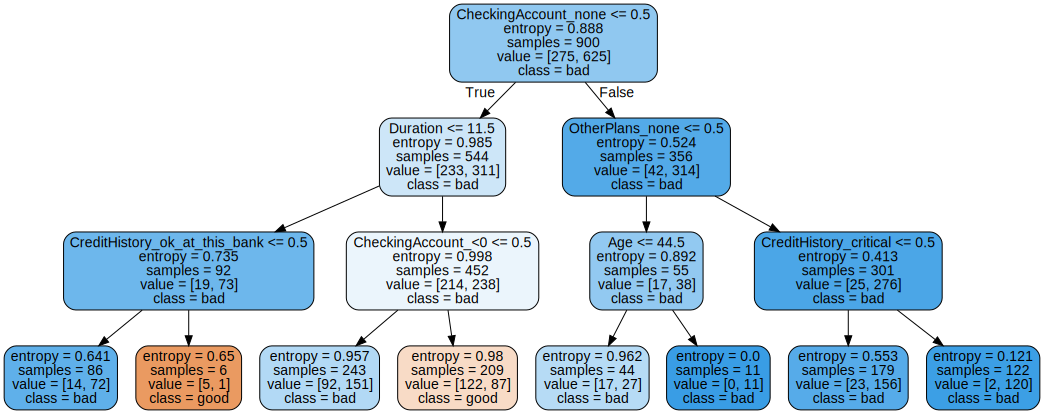

In [11]:
# Visualize the decision tree based on the first model
# The same one that we got in the Lab material
dot_data = export_graphviz(dt, out_file=None, 
    feature_names=column_names,  
    class_names=credit_clean['Approve'].unique(),  
    filled=True, rounded=True,  
    special_characters=False)
graph = graphviz.Source(dot_data)
graph

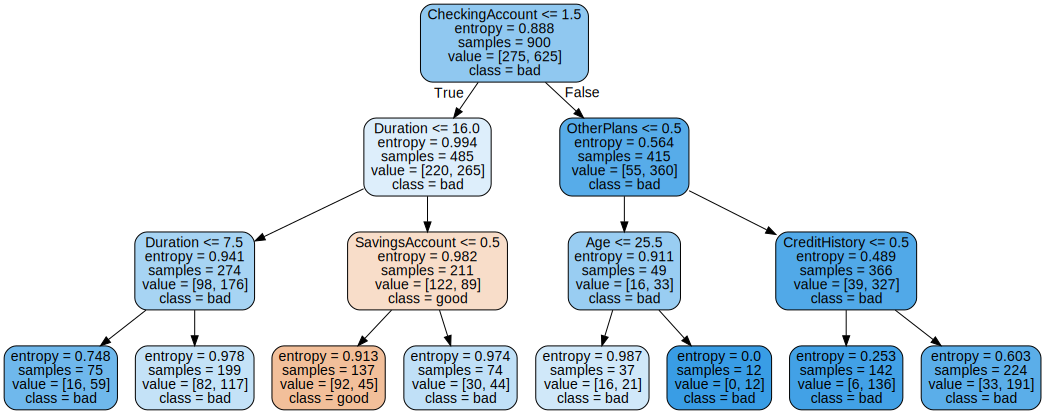

In [12]:
# Visualize the decision tree based on the second model
dot_data = export_graphviz(dt1, out_file=None, 
    feature_names=credit_clean.columns[:-1],  
    class_names=credit_clean['Approve'].unique(),  
    filled=True, rounded=True,  
    special_characters=False)
graph = graphviz.Source(dot_data)
graph

In [13]:
# The categories of CheckingAccount and OtherPlans
print(oe.categories_[0])
print(oe.categories_[13])
# The first 50 values of CheckingAccount and OtherPlans after OrdinalEncoder
print(X_oe[:50,0])
print(X_oe[:50,13])

['<0' '<200' '>=200' 'none']
['bank' 'none' 'stores']
[0. 1. 3. 0. 0. 3. 3. 1. 3. 1. 1. 0. 1. 0. 0. 0. 3. 0. 1. 3. 3. 0. 0. 1.
 3. 0. 3. 2. 1. 0. 1. 0. 1. 3. 2. 1. 3. 2. 2. 1. 3. 1. 1. 0. 0. 3. 3. 0.
 3. 3.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 2. 1. 1. 0. 1. 0. 2. 1. 1. 0. 1. 1. 1. 2. 1. 1. 1.
 1. 1.]


The second decision tree graph and some examples above can explain where the last two paragraphs in the answer to the Question 1.13 are from: 

- It shows that we will classify a loan as `bad` if the CheckingAccount in (2, 3) i.e. is '>=200' or 'none' `(that is, when CheckingAccount <= 1.5 is False)`, and even worse if OtherPlans in (1, 2) i.e. is 'none' or 'stores' `(that is, when OtherPlans <= 0.5 is False)`.

- The attribute with highest information gain is the one at the top of the tree - `CheckingAccount`. Its critical value is 1.5 `(as we have CheckingAccount <= 1.5 in the top block)`.

- To trace back the original values we have to make use of the associated LabelEncoder.

In [14]:
# How to use LabelEncoder to trace back the original values
le = LabelEncoder()
le.fit(credit_clean['CheckingAccount'])
print(le.classes_)
CA_transformed = le.transform(credit_clean['CheckingAccount'][:50])
CA_transformed

['<0' '<200' '>=200' 'none']


array([0, 1, 3, 0, 0, 3, 3, 1, 3, 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 3, 3, 0,
       0, 1, 3, 0, 3, 2, 1, 0, 1, 0, 1, 3, 2, 1, 3, 2, 2, 1, 3, 1, 1, 0,
       0, 3, 3, 0, 3, 3])

In [15]:
le.inverse_transform(CA_transformed)

array(['<0', '<200', 'none', '<0', '<0', 'none', 'none', '<200', 'none',
       '<200', '<200', '<0', '<200', '<0', '<0', '<0', 'none', '<0',
       '<200', 'none', 'none', '<0', '<0', '<200', 'none', '<0', 'none',
       '>=200', '<200', '<0', '<200', '<0', '<200', 'none', '>=200',
       '<200', 'none', '>=200', '>=200', '<200', 'none', '<200', '<200',
       '<0', '<0', 'none', 'none', '<0', 'none', 'none'], dtype=object)

In [16]:
# Use OrdinalEncoder to trace back the original values
oe.inverse_transform(X_oe)[:50,0]

array(['<0', '<200', 'none', '<0', '<0', 'none', 'none', '<200', 'none',
       '<200', '<200', '<0', '<200', '<0', '<0', '<0', 'none', '<0',
       '<200', 'none', 'none', '<0', '<0', '<200', 'none', '<0', 'none',
       '>=200', '<200', '<0', '<200', '<0', '<200', 'none', '>=200',
       '<200', 'none', '>=200', '>=200', '<200', 'none', '<200', '<200',
       '<0', '<0', 'none', 'none', '<0', 'none', 'none'], dtype=object)

OrdinalEncode和LabelEncoder的区别在于：
- 1）OE要求编码的数据维度是2-D array, 而LE要求是一维的； 
- 2）OE主要用于给feature values(X)编码，而LE是给target values(y)编码；
- 3）在sklearn0.20.之前的版本中，OE是没有的，但可以用LE+loop给feature values编码

References:
- [特征编码总结 Kaggle](https://zhuanlan.zhihu.com/p/117230627)
- [什么时候用one-hot-encoding, labelencoder和dictvectorizor stackoverflow]( https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor)
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
